0.009 --> 0.009 --> 0.008 --> 0.008 --> 0.008 --> 0.007 --> 0.007 --> 0.006 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 


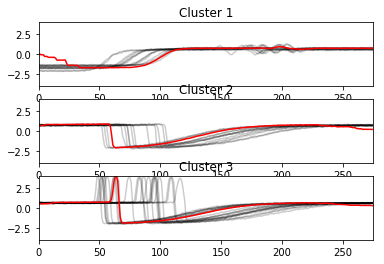

In [1]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import KShape
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
# Keep first 3 classes
X_train = X_train[y_train < 4]
numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
sz = X_train.shape[1]

# Euclidean k-means
ks = KShape(n_clusters=3, verbose=True, random_state=seed)
y_pred = ks.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

plt.show()

Remove model files if present

In [2]:
!rm ./test_ks_hdf.hdf5 ./test_ks_json.json ./test_ks_pick.pick

Save models to file

In [3]:
ks.to_json('./test_ks_json.json')
ks.to_hdf5('./test_ks_hdf.hdf5')
ks.to_pickle('./test_ks_pick.pick')

Remove original kshape object

In [4]:
del ks

Load the models

In [5]:
ksj = KShape.from_json('./test_ks_json.json')
ksh = KShape.from_hdf5('./test_ks_hdf.hdf5')
ksp = KShape.from_pickle('./test_ks_pick.pick')

Test that all of the file formats can be loaded & used for predictions

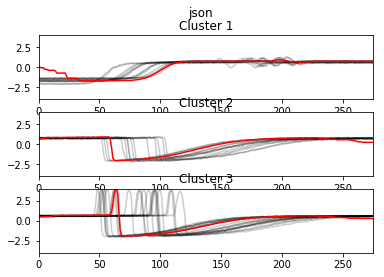

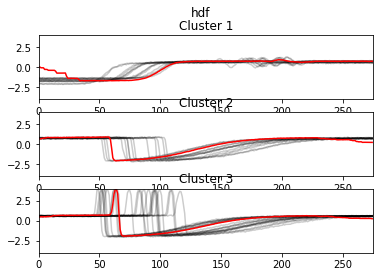

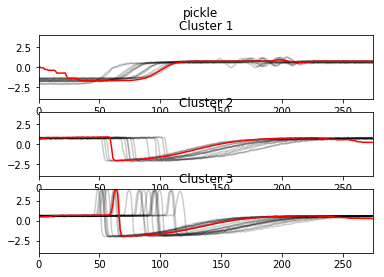

In [6]:
for md, title in zip([ksj, ksh, ksp], ['json', 'hdf', 'pickle']):
    y_pred = md.predict(X_train)
    fig = plt.figure()
    fig.suptitle(title)
    for yi in range(3):
        plt.subplot(3, 1, 1 + yi)
        for xx in X_train[y_pred == yi]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(md.cluster_centers_[yi].ravel(), "r-")
        plt.xlim(0, sz)
        plt.ylim(-4, 4)
        plt.title("Cluster %d" % (yi + 1))

    plt.show()